In [1]:
import vnquant.data as dt
from vnquant import plot as pl

import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import numpy as np
import pandas as pd

from utils import *

from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
start="2013-01-30"
end="2023-12-31"

pl.vnquant_candle_stick(
    data='VND',
    title=f'VND symbol from {start} to {end}',
    xlab='Date', ylab='Price',
    start_date= start,
    end_date=end,
    data_source='VND',
    show_advanced=['volume', 'macd', 'rsi']
)

2023-11-05 11:35:52,809 : INFO : data VND from 2013-01-30 to 2023-12-31 have already cloned!


**CLONE DATA CÁC MÃ CỔ PHIẾU TỪ VNQUAT**

In [3]:
stock_VCB= SelectedStock("VCB", "2020-01-01", "2023-01-01")


2023-11-05 11:35:54,775 : INFO : data VCB from 2020-01-01 to 2023-01-01 have already cloned!


**THÔNG TIN VỀ MÃ CỔ PHIẾU ĐƯỢC CLONE**

stock_VCB

In [4]:
stock_VCB.stock_infor(5)
stock_VCB.stock_chart()


Attributes  high   low  open close    avg    volume
Symbols      VCB   VCB   VCB   VCB    VCB       VCB
2020-01-02  91.4  89.7  90.2  90.8  90.68  386290.0
2020-01-03  91.8  89.9  91.5  89.9  90.81  536130.0
2020-01-04   NaN   NaN   NaN   NaN    NaN       NaN
2020-01-05   NaN   NaN   NaN   NaN    NaN       NaN
2020-01-06  89.5  87.5  89.2  87.5  88.54  880110.0
stock VCB is OHLC: 'True' and OHLCV: 'True'


**TRỰC QUAN HÓA CÁC CỘT DỮ LIỆU TRONG DATA**

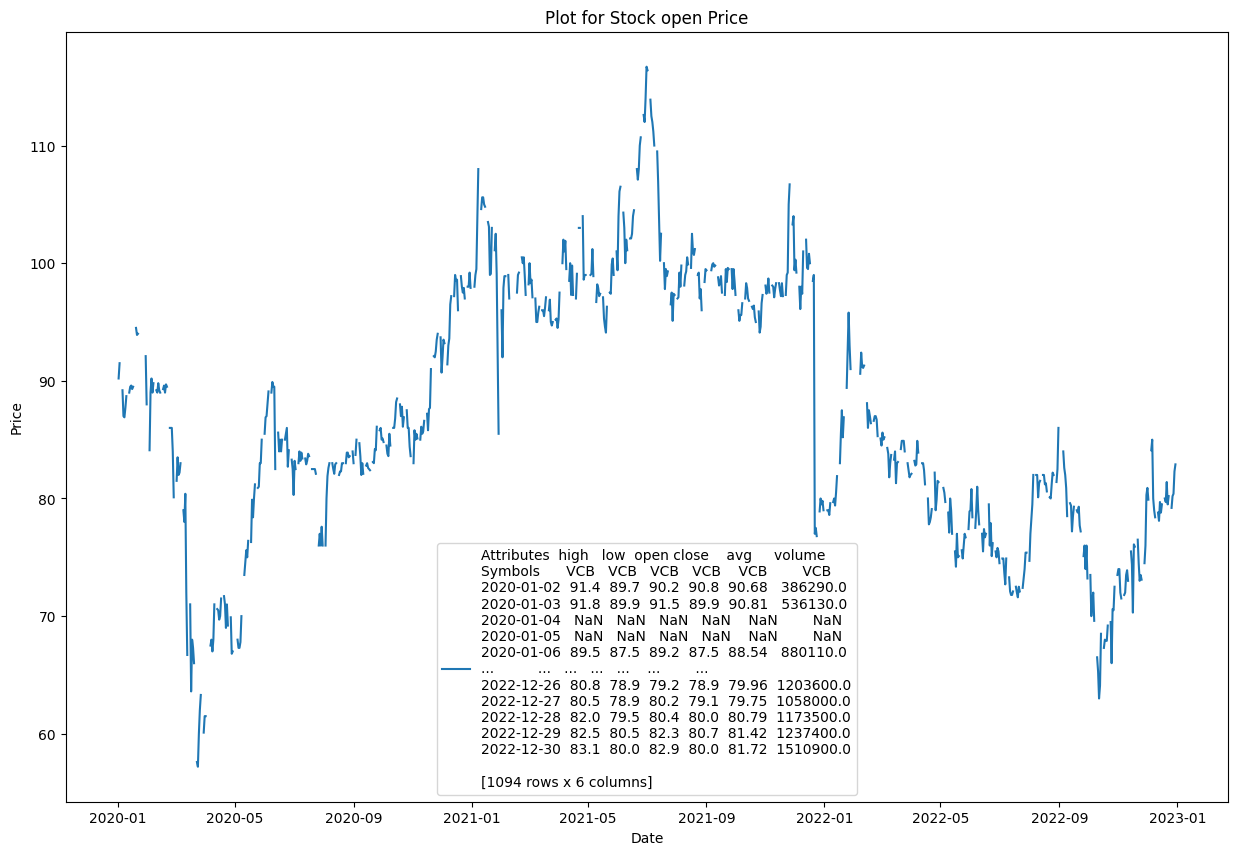

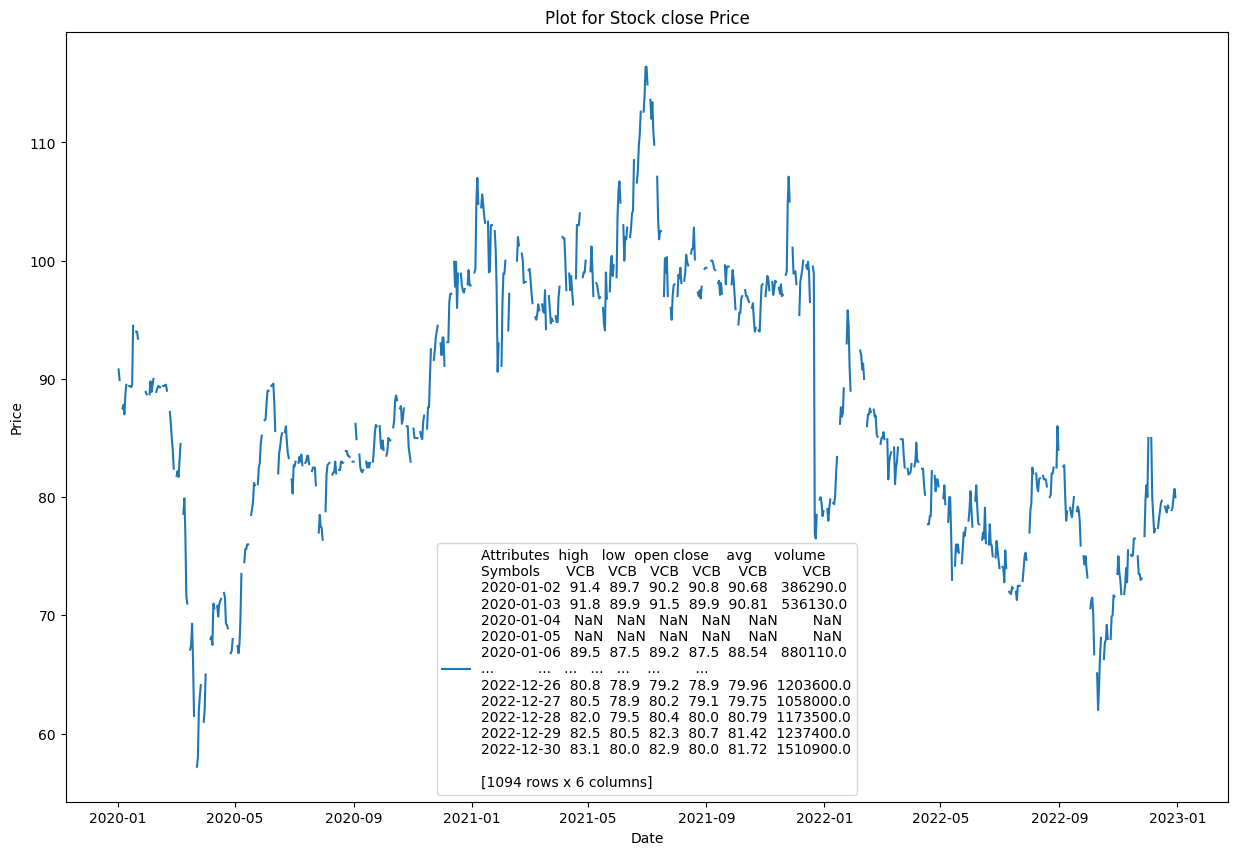

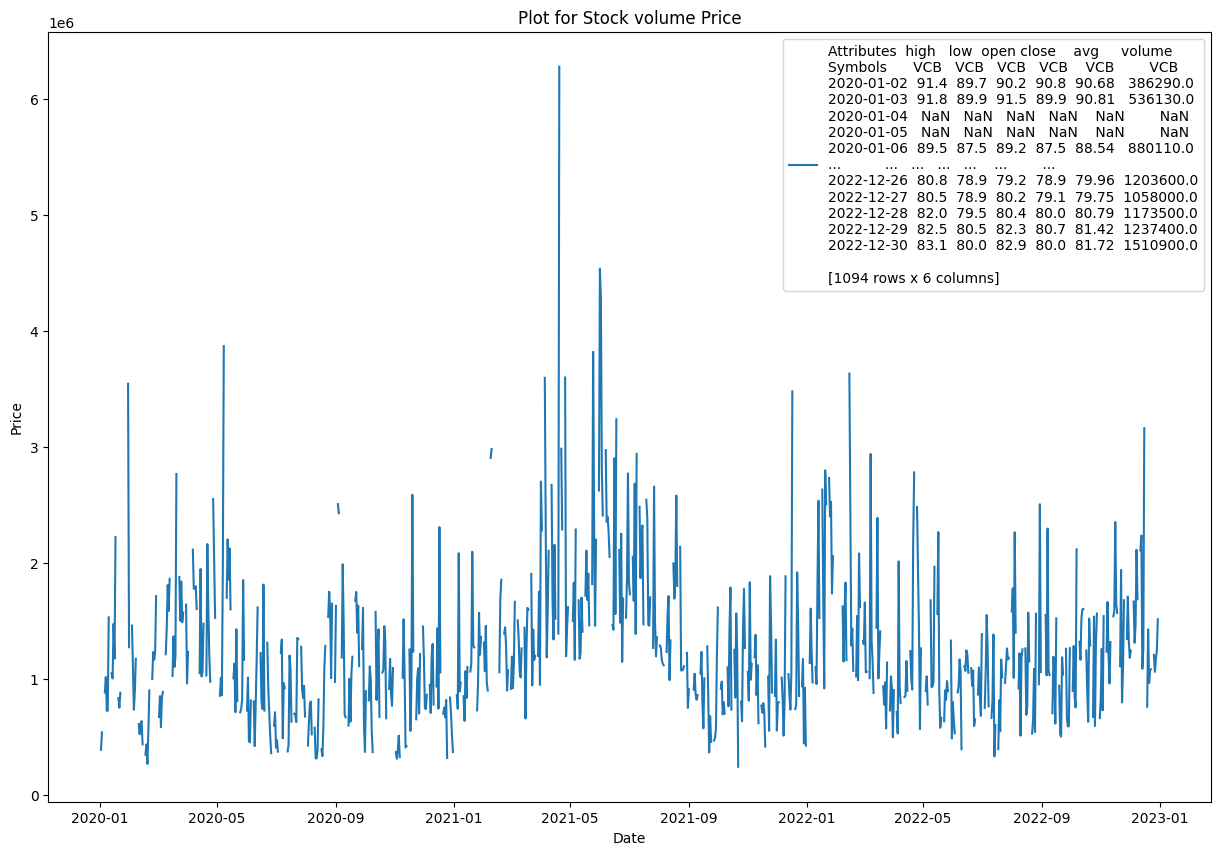

In [5]:
stocks = {
    'stock_VCB': stock_VCB.data 
}

stockchart.plot_prices('open',stocks)
stockchart.plot_prices('close',stocks)
stockchart.plot_prices('volume',stocks)

In [6]:
stock_VCB.data.iloc[1] = np.nan
stock_VCB.data.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
stock_VCB.data.head()

Attributes,high,low,open,close,avg,volume
Symbols,VCB,VCB,VCB,VCB,VCB,VCB
2020-01-02,91.400,89.70,90.20,90.800,90.680,386290.0
2020-01-03,90.925,89.15,89.95,89.975,90.145,509745.0
2020-01-04,90.450,88.60,89.70,89.150,89.610,633200.0
2020-01-05,89.975,88.05,89.45,88.325,89.075,756655.0
2020-01-06,89.500,87.50,89.20,87.500,88.540,880110.0


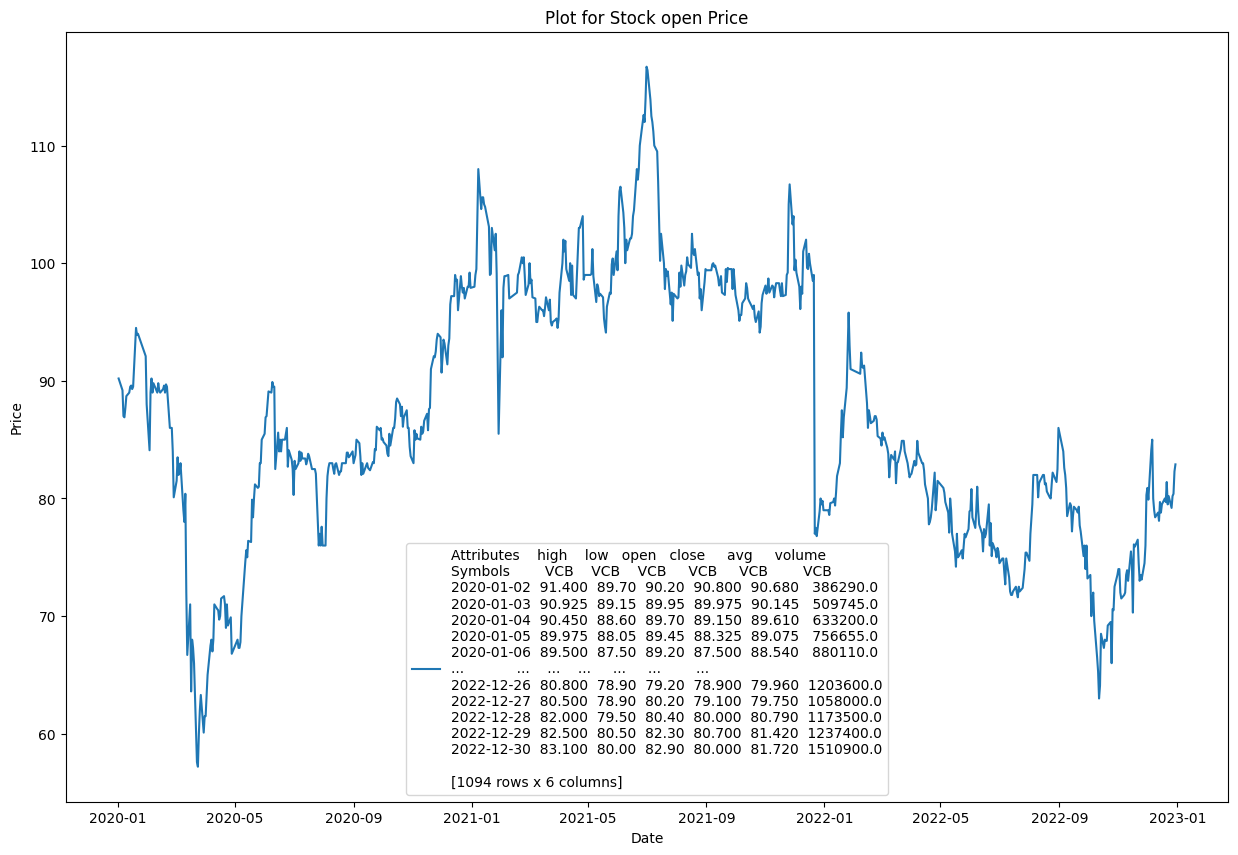

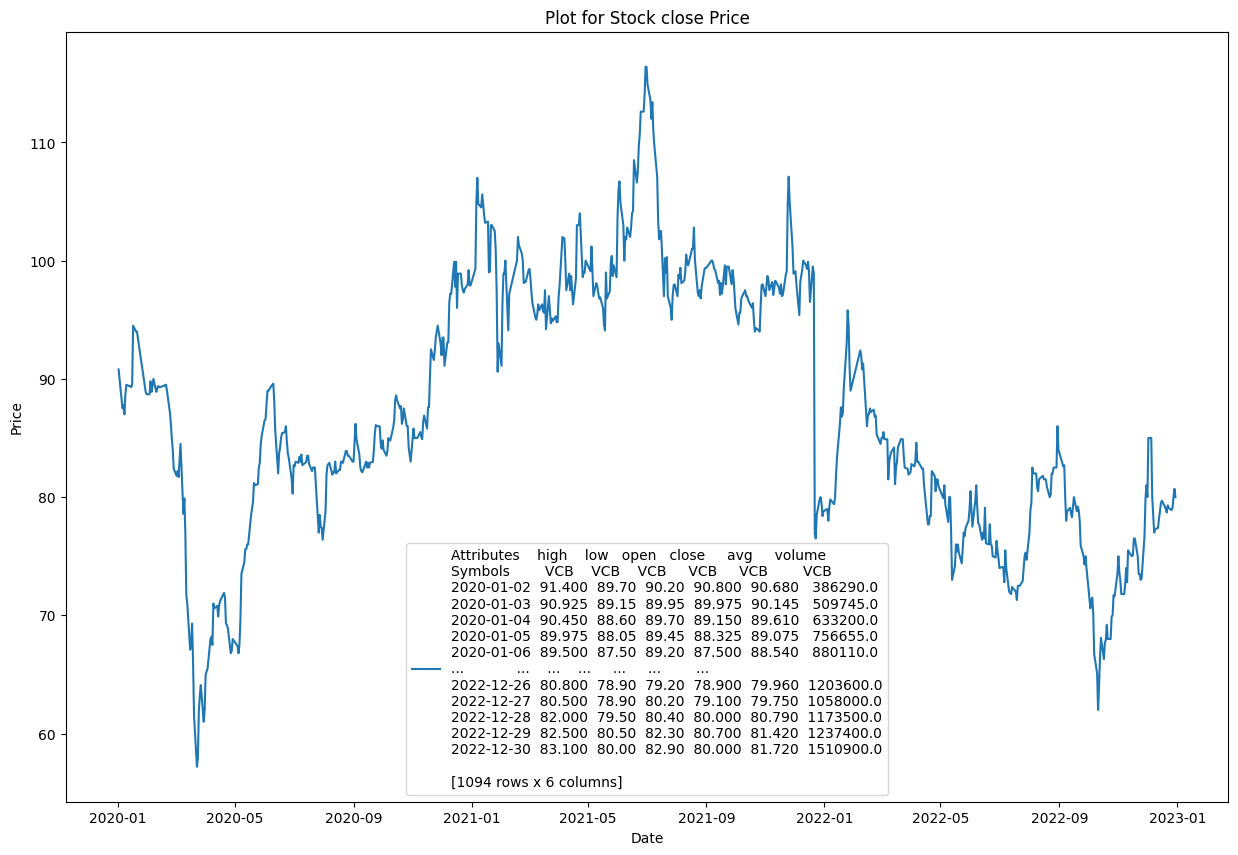

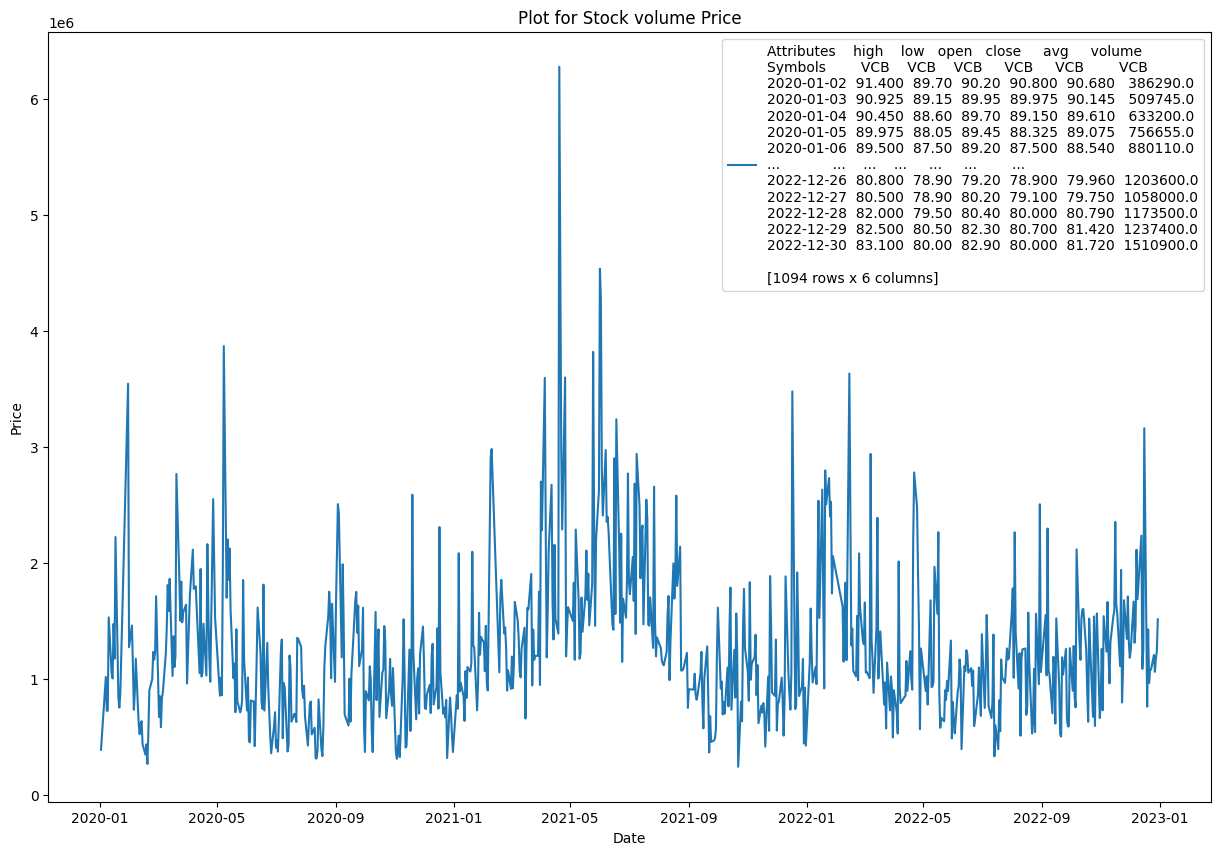

In [7]:
stocks = {
    'stock_VCB': stock_VCB.data 
}

stockchart.plot_prices('open',stocks)
stockchart.plot_prices('close',stocks)
stockchart.plot_prices('volume',stocks)

**TIẾN HÀNH TÍNH TOÁN CÁC THÔNG SỐ**

stock_VCB

In [8]:
stock_VCB_copy = stock_VCB.data.copy()
stock_VCB_calculate = StockAnalysis(stock_VCB_copy)
stock_VCB_calculate.calculate_moving_average(window=50)
stock_VCB_calculate.calculate_rsi(window=14)
stock_VCB_calculate.calculate_bollinger_bands(window=20)
stock_VCB_calculate.calculate_macd(short_window=12, long_window=26)
stock_VCB_calculate.calculate_daily_returns()
# stock_VCB_calculate.calculate_percent_daily_returns()
# stock_VCB_calculate.calculate_cumulative_returns()


stock_VCB_sharpe_ratio = stock_VCB_calculate.calculate_sharpe_ratio(4)
stock_VCB_gains,stock_VCB_losses=stock_VCB_calculate.calculate_total_gains_and_losses()
print(f"sharpe_ratio : {stock_VCB_sharpe_ratio }")
print(f"total_gains_and_losses: {stock_VCB_gains} and {stock_VCB_losses}")
stock_VCB_calculate.data = stock_VCB_calculate.data.iloc[1:]
print(stock_VCB_calculate.data.head(5))

sharpe_ratio : -4029.899327186524
total_gains_and_losses: 4.933930575550983 and -5.06056322648435
Attributes    high    low   open   close     avg     volume Moving_Average_50  \
Symbols        VCB    VCB    VCB     VCB     VCB        VCB                     
2020-01-03  90.925  89.15  89.95  89.975  90.145   509745.0               NaN   
2020-01-04  90.450  88.60  89.70  89.150  89.610   633200.0               NaN   
2020-01-05  89.975  88.05  89.45  88.325  89.075   756655.0               NaN   
2020-01-06  89.500  87.50  89.20  87.500  88.540   880110.0               NaN   
2020-01-07  87.900  85.40  87.00  87.800  86.540  1013270.0               NaN   

Attributes RSI_14 Upper_Bollinger_Band_20 Lower_Bollinger_Band_20 MACD_12_26  \
Symbols                                                                        
2020-01-03    NaN                     NaN                     NaN  -0.065812   
2020-01-04    NaN                     NaN                     NaN  -0.182436   
2020-01-05    

In [9]:
stock_VCB_calculate.data.info()
stock_VCB_calculate.data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1093 entries, 2020-01-03 to 2022-12-30
Freq: D
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   (high, VCB)                  1093 non-null   float64
 1   (low, VCB)                   1093 non-null   float64
 2   (open, VCB)                  1093 non-null   float64
 3   (close, VCB)                 1093 non-null   float64
 4   (avg, VCB)                   1093 non-null   float64
 5   (volume, VCB)                1093 non-null   float64
 6   (Moving_Average_50, )        1045 non-null   float64
 7   (RSI_14, )                   1081 non-null   float64
 8   (Upper_Bollinger_Band_20, )  1075 non-null   float64
 9   (Lower_Bollinger_Band_20, )  1075 non-null   float64
 10  (MACD_12_26, )               1093 non-null   float64
 11  (Signal_Line_12_26, )        1093 non-null   float64
 12  (Daily_Returns, )            1093 non-null   float

Attributes               Symbols
high                     VCB         0
low                      VCB         0
open                     VCB         0
close                    VCB         0
avg                      VCB         0
volume                   VCB         0
Moving_Average_50                   48
RSI_14                              12
Upper_Bollinger_Band_20             18
Lower_Bollinger_Band_20             18
MACD_12_26                           0
Signal_Line_12_26                    0
Daily_Returns                        0
dtype: int64

In [10]:
stock_VCB_calculate.data.describe()

Attributes,high,low,open,close,avg,volume,Moving_Average_50,RSI_14,Upper_Bollinger_Band_20,Lower_Bollinger_Band_20,MACD_12_26,Signal_Line_12_26,Daily_Returns
Symbols,VCB,VCB,VCB,VCB,VCB,VCB,,,,,,,
count,1093.000000,1093.000000,1093.000000,1093.000000,1093.000000,1.093000e+03,1045.000000,1081.000000,1075.000000,1075.000000,1093.000000,1093.000000,1093.000000
mean,88.168573,85.964959,87.102882,87.107502,87.045086,1.282581e+06,87.230762,50.689831,91.697516,82.622156,-0.077983,-0.079726,-0.000116
std,10.966601,10.818787,10.958770,10.944427,10.893344,6.413873e+05,10.290234,21.422945,11.044936,11.165323,1.564137,1.454157,0.015757
min,58.400000,56.600000,57.200000,57.200000,57.270000,2.400000e+05,66.847000,0.000000,69.712260,52.356946,-6.686075,-5.801976,-0.251603
25%,80.400000,78.400000,79.500000,79.200000,79.270000,8.510000e+05,78.789200,35.483871,84.160665,74.684921,-0.671760,-0.658012,-0.005650
50%,86.100000,84.533333,85.200000,85.266667,85.250000,1.162133e+06,85.484000,49.568966,89.724420,81.842715,-0.070286,-0.081272,0.000000
75%,98.400000,96.400000,97.300000,97.333333,97.356667,1.564033e+06,97.760667,66.129032,100.833129,93.797488,0.779590,0.723185,0.005141
max,117.200000,115.000000,116.700000,116.400000,116.120000,6.274200e+06,106.937333,100.000000,120.765776,107.161969,3.718848,3.561193,0.066691


**KHỞI TẠO CHUỖI LỢI XUẤT THAY CHO VIỆC DỰ ĐOÁN CHUỖI GIÁ ĐÓNG**

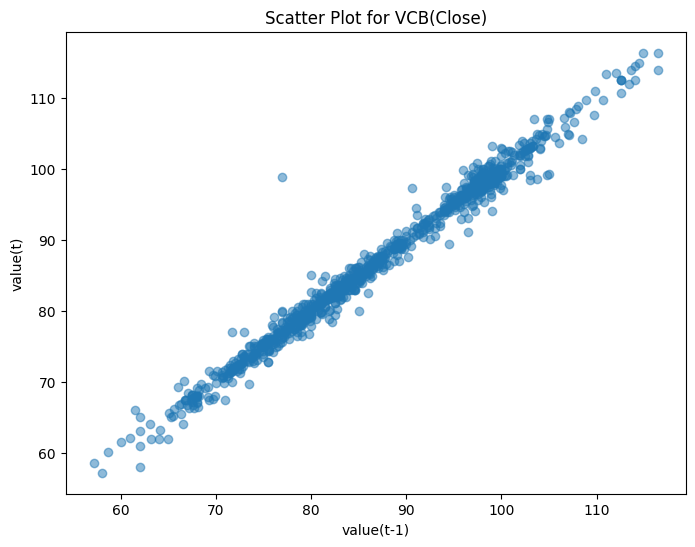

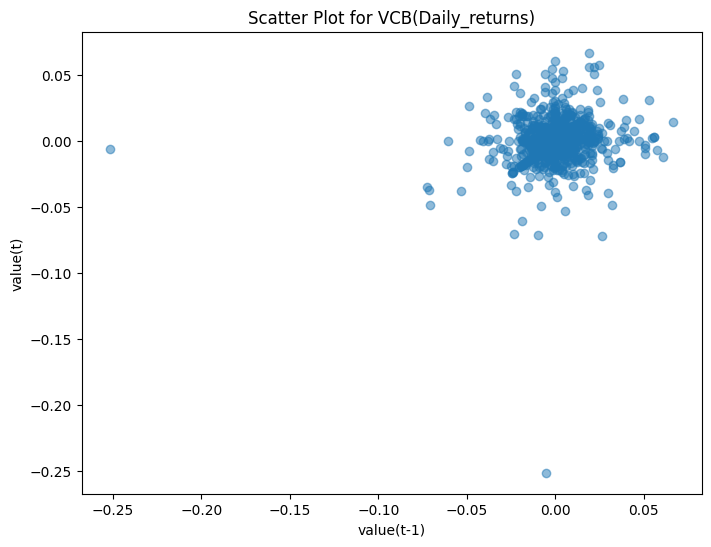

In [11]:
stockchart.plot_scatter('close',stock_VCB_calculate.data,"VCB")
stockchart.plot_scatter('Daily_Returns',stock_VCB_calculate.data,"VCB")


**XÁC ĐỊNH LOẠI BỎ GIÁ TRỊ NGOẠI LAI**

VCB

1093


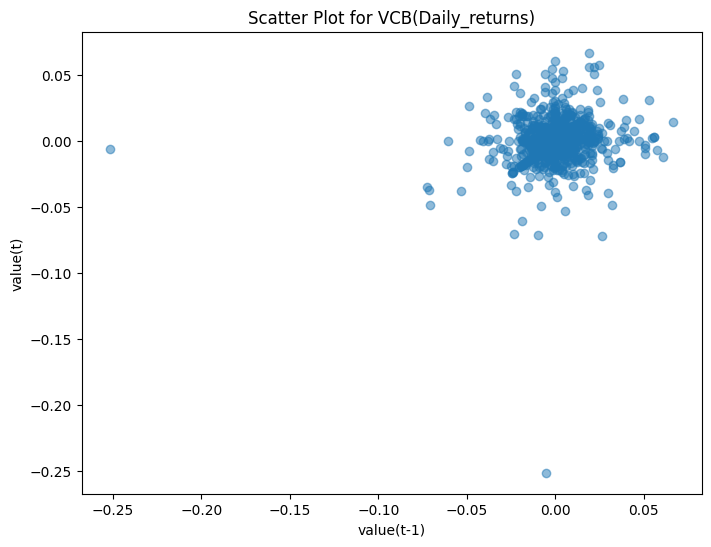

Đã loại bỏ 17 phần tử
1076


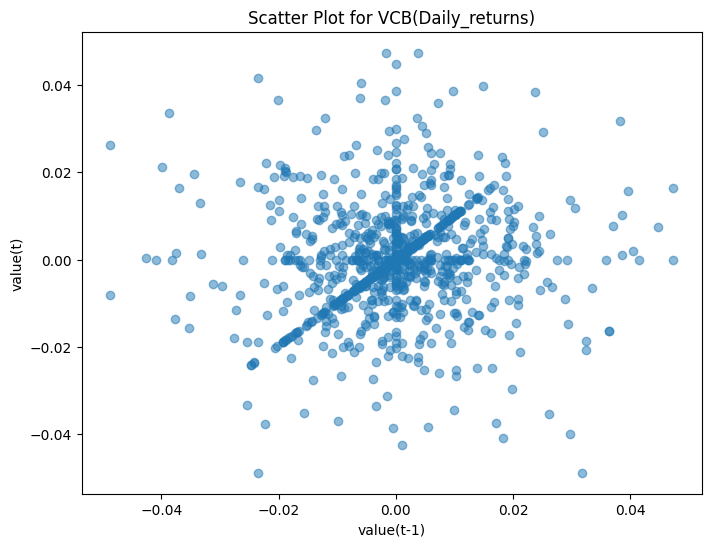

In [12]:
print(len(stock_VCB_calculate.data))
stockchart.plot_scatter('Daily_Returns',stock_VCB_calculate.data,"VCB")
VCB_cleaned = remove_outliers_IQR(stock_VCB_calculate.data,"Daily_Returns",4)

has_nan = VCB_cleaned["Daily_Returns"].isna()
VCB_cleaned = VCB_cleaned[~has_nan]

print(len(VCB_cleaned))
stockchart.plot_scatter('Daily_Returns',VCB_cleaned,"VCB")

In [13]:
import pandas as pd
full_date_rng =  pd.date_range(start=VCB_cleaned.index[0], end=VCB_cleaned.index[-1], freq='D')

df = VCB_cleaned.reindex(full_date_rng)


print(df.isna().sum())


Attributes               Symbols
high                     VCB        17
low                      VCB        17
open                     VCB        17
close                    VCB        17
avg                      VCB        17
volume                   VCB        17
Moving_Average_50                   64
RSI_14                              29
Upper_Bollinger_Band_20             34
Lower_Bollinger_Band_20             34
MACD_12_26                          17
Signal_Line_12_26                   17
Daily_Returns                       17
dtype: int64


**TRỰC QUAN HÓA PHÂN BỔ XÁC XUẤT CỦA CHUỖI LỢI XUẤT**

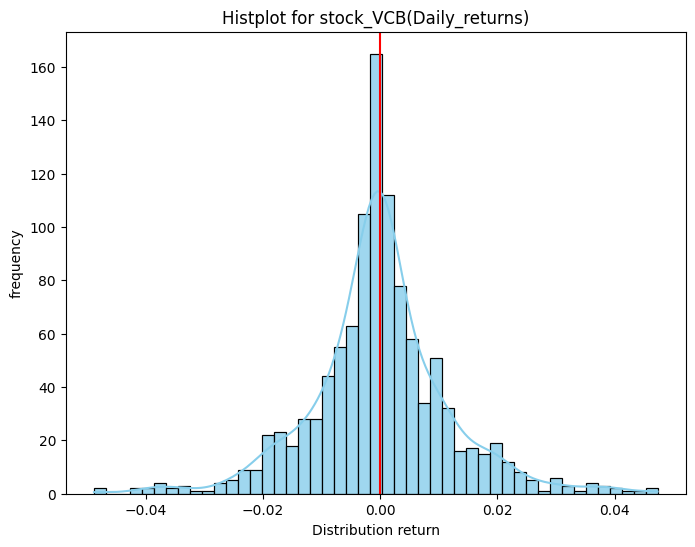

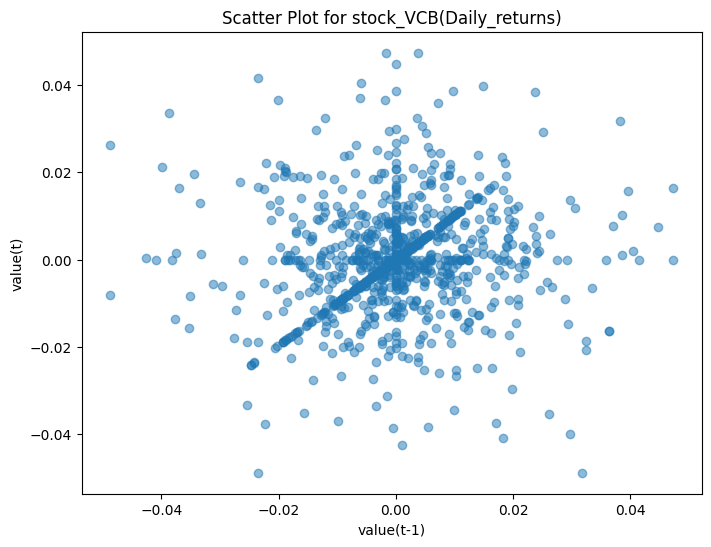

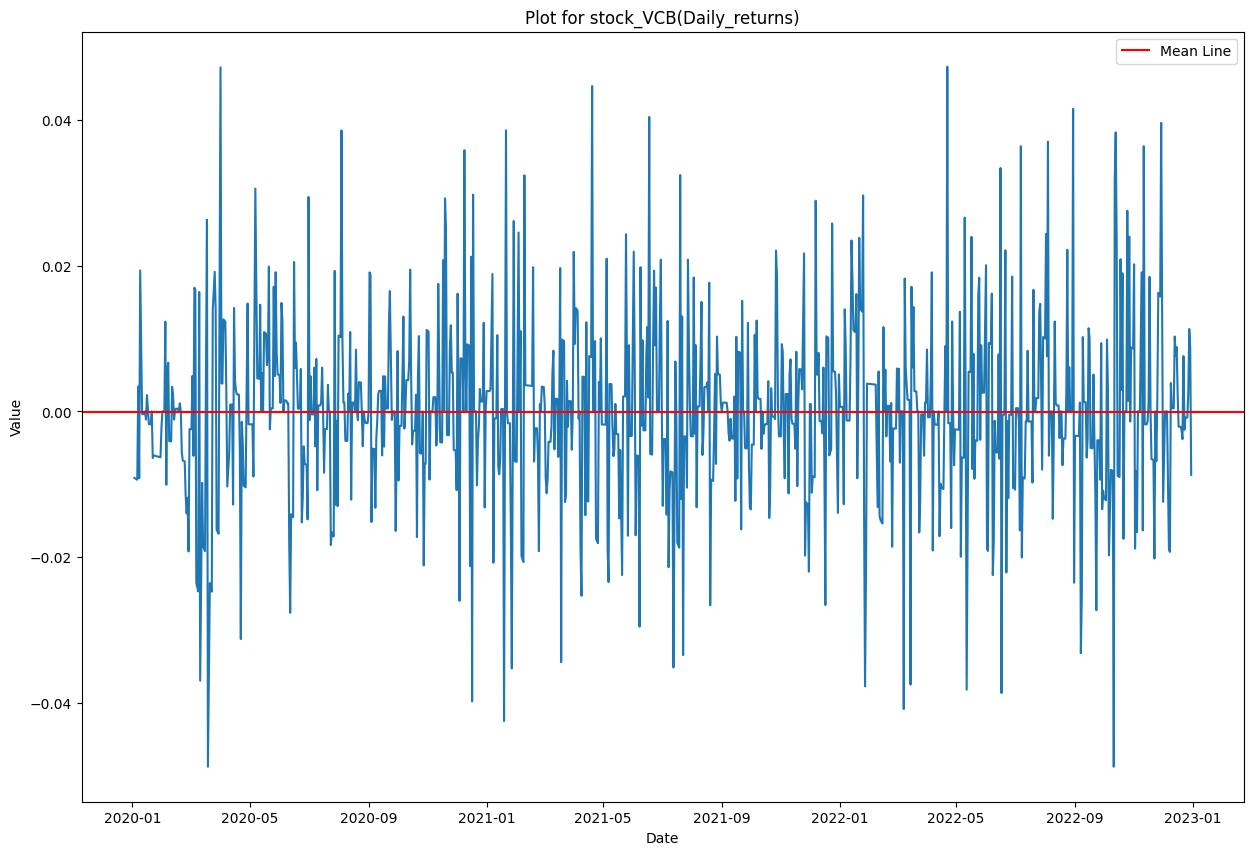

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

stocks = {
    'stock_VCB': VCB_cleaned
}
# multi_chart_KDE = MultiStockChart(stocks)
stockchart.plot_ultimate('Daily_Returns',stocks)

**CHECKING CHỈ SỐ AIC (ĐIỀU KIỆN CHỌN CHUỖI TIME  SERIES CÓ P<0.05**

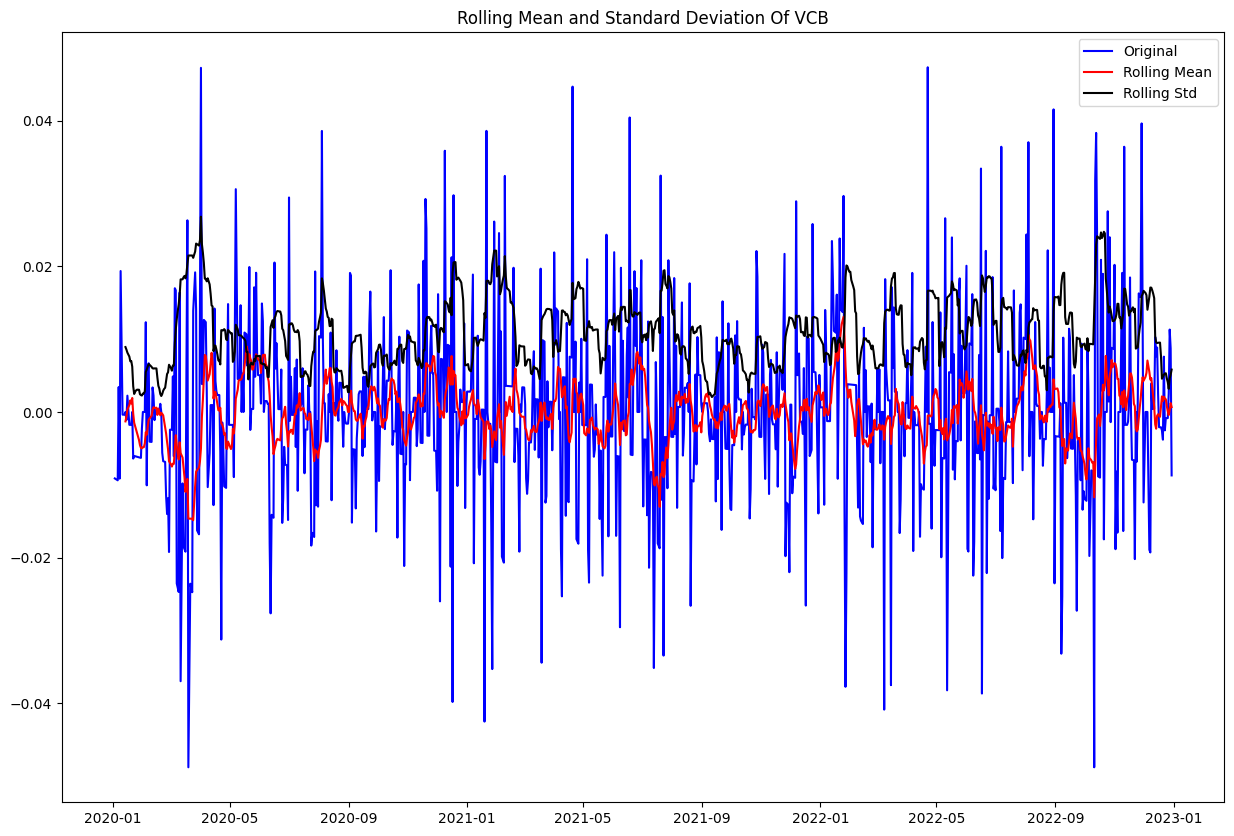

Results of Argument dickey fuller test VCB:
Test Statistics                 -29.869442
p-value                           0.000000
No. of lags used                  0.000000
Number of observations used    1075.000000
critical value (1%)              -3.436448
critical value (5%)              -2.864232
critical value (10%)             -2.568204
dtype: float64


In [15]:
test_stationarity(VCB_cleaned['Daily_Returns'],"VCB")

In [16]:
# stock_VCB_calculate.data_1 = stock_VCB_calculate.data.droplevel('Symbols', axis=1)
# VCB_cleaned_test = remove_outliers_IQR(stock_VCB_calculate.data_1,"close",20)
# stock_FPT_calculate.data_1 = stock_FPT_calculate.data.droplevel('Symbols', axis=1)
# FPT_cleaned_test = remove_outliers_IQR(stock_FPT_calculate.data_1,"close",20)
# stock_SSI_calculate.data_1 = stock_SSI_calculate.data.droplevel('Symbols', axis=1)
# SSI_cleaned_test = remove_outliers_IQR(stock_SSI_calculate.data_1,"close",20)

# VCB_Diff_1 = VCB_cleaned_test['close'].diff().dropna()
# test_stationarity(VCB_Diff_1 ,"VCB")
# FPT_Diff_1 = FPT_cleaned['close'].diff().dropna()
# test_stationarity(FPT_Diff_1 ,"FPT")
# SSI_Diff_1 = SSI_cleaned['close'].diff().dropna()
# test_stationarity(SSI_Diff_1 ,"SSI")

**TEST_ARIMA_AUTO**

<Figure size 1500x500 with 0 Axes>

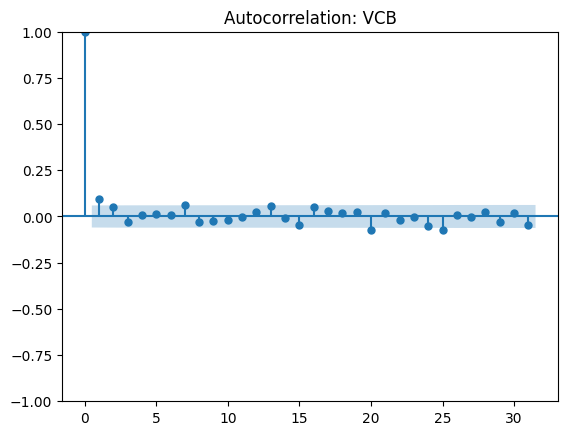

<Figure size 1500x500 with 0 Axes>

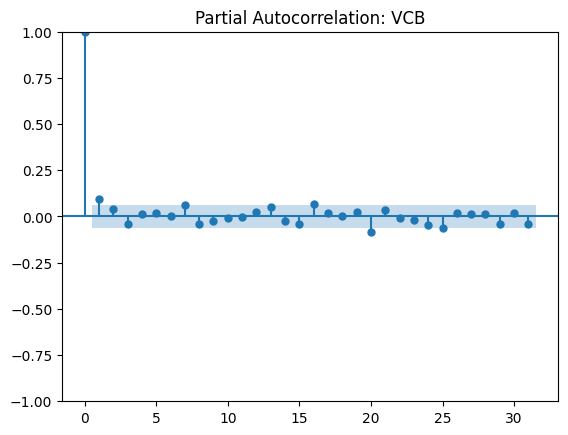

<Figure size 1500x500 with 0 Axes>

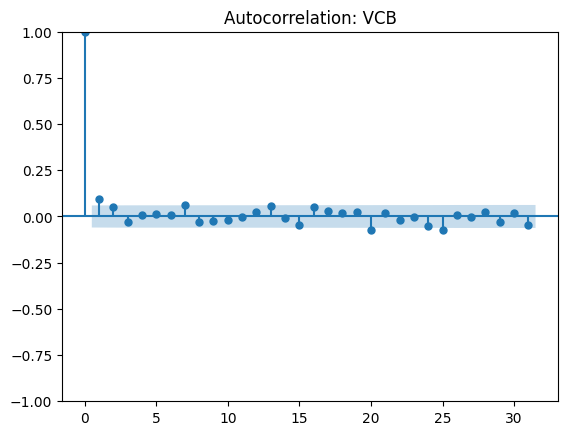

<Figure size 1500x500 with 0 Axes>

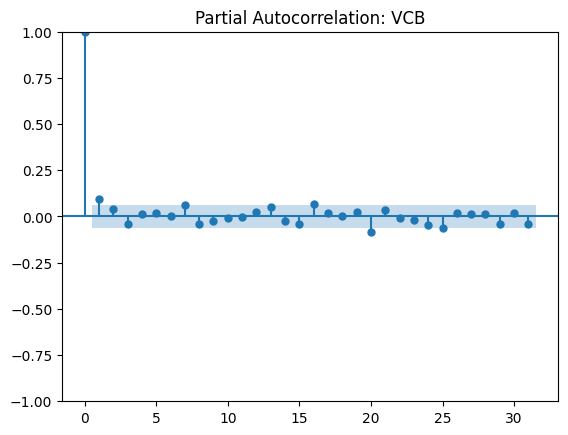

In [17]:

acf_pacf_plot(VCB_cleaned['Daily_Returns'],"VCB")
acf_pacf_plot(VCB_cleaned['Daily_Returns'],"VCB")

In [18]:
print(len(VCB_cleaned))
train_VCB = VCB_cleaned['Daily_Returns'][:720]
test_VCB = VCB_cleaned['Daily_Returns'][720:]
print(len(train_VCB ))
print(len(test_VCB))

1076
720
356


In [19]:
import pmdarima as pm
import warnings
warnings.filterwarnings("ignore")
model = pm.auto_arima(train_VCB,start_p=2, start_q=2, max_p=5, max_d=5, max_q=5,
                           seasonal=False,
                           trace=True,
                           error_action='ignore',  
                           suppress_warnings=True,stepwise=True
                           )
# make your forecasts
model.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-4402.702, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-4399.250, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-4406.036, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=-4405.173, Time=0.08 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-4405.531, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-4405.047, Time=0.13 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-4404.183, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-4404.283, Time=0.15 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 0.840 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  720
Model:               SARIMAX(1, 0, 0)   Log Likelihood                2205.018
Date:                Sun, 05 Nov 2023   AIC                          -4406.036
Time:                        11:36:05   BIC                          -4396.877
Sample:                             0   HQIC                         -4402.500
                                - 720                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1102      0.029      3.814      0.000       0.054       0.167
sigma2         0.0001   4.56e-06     28.063      0.000       0.000       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):               208.19
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.90   Skew:                             0.07
Prob(H) (two-sided):                  0.39   Kurtosis:                         5.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [20]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

start_date = pd.to_datetime('2020-01-03')
end_date = pd.to_datetime('2022-11-21')
train_VCB_sliced = train_VCB[(train_VCB.index >= start_date) & (train_VCB.index <= end_date)]

model = sm.tsa.ARIMA(train_VCB_sliced, order=(2, 0, 2))
result = model.fit()
print(result.summary().tables[1])
predictions = result.predict(start=len(train_VCB), end=len(train_VCB) + len(train_VCB) - 1, dynamic=False, typ='levels')


rmse = np.sqrt(mean_squared_error(train_VCB, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002      0.000     -0.485      0.628      -0.001       0.001
ar.L1         -0.4823      0.428     -1.126      0.260      -1.322       0.357
ar.L2          0.0932      0.348      0.268      0.789      -0.589       0.775
ma.L1          0.5888      0.430      1.371      0.170      -0.253       1.431
ma.L2          0.0134      0.335      0.040      0.968      -0.643       0.669
sigma2         0.0001   4.57e-06     27.873      0.000       0.000       0.000
Root Mean Squared Error (RMSE): 0.011383818130039261


In [21]:
# result.plot_diagnostics(figsize=(15, 12))

In [22]:
# VCB_cleaned['Daily_Returns']
# len(test_VCB)
# print(train_VCB.tail())
# print(VCB_cleaned['Daily_Returns'][720:].head())

<Axes: >

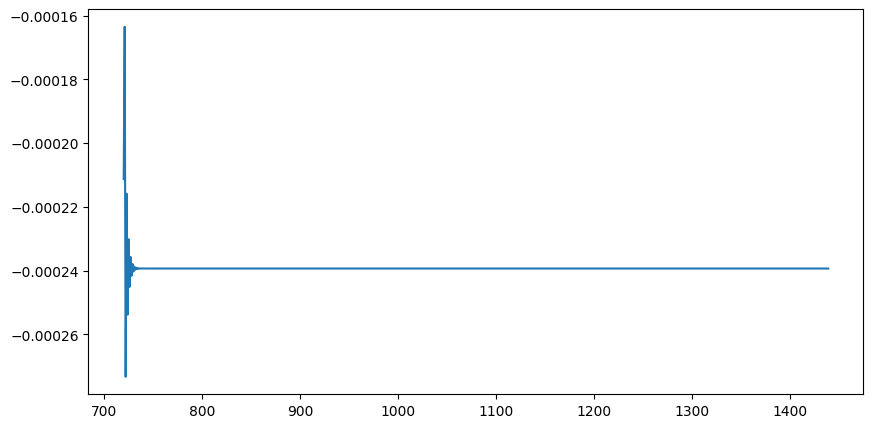

In [23]:
predictions.plot(figsize=(10, 5))

In [24]:
pred = result.get_prediction(start=pd.to_datetime('2022-1-12'),end=pd.to_datetime('2022-10-28'), dynamic=False, typ='levels')
pred_ci = pred.conf_int()

ax = VCB_cleaned['Daily_Returns']['2022-1-1':'2022-10-28'].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.legend()
plt.show()

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

Root Mean Squared Error (RMSE): 0.01797958432918014


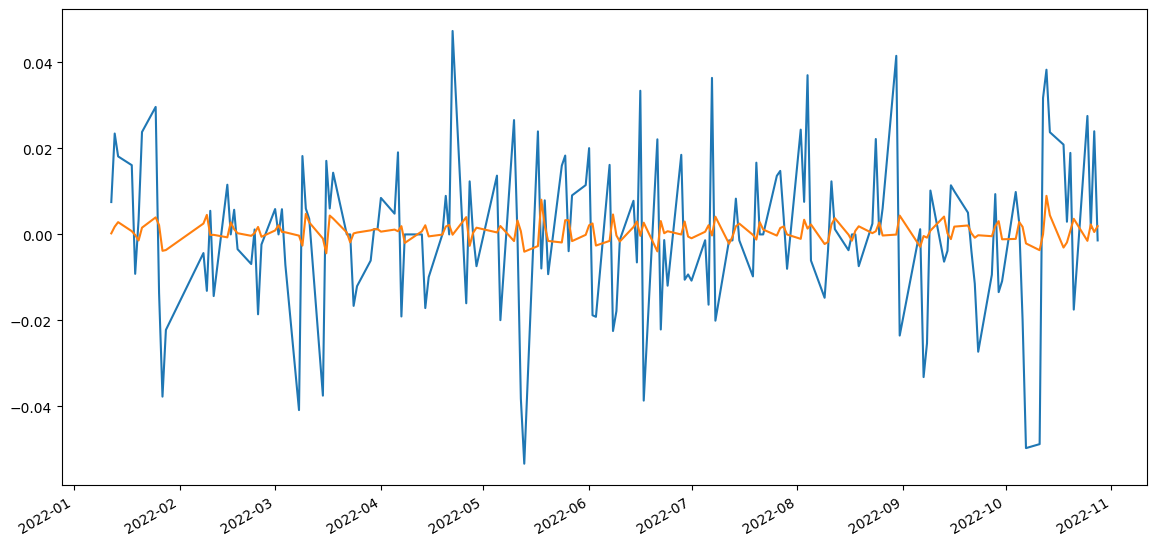

In [ ]:
predicted_values = pred.predicted_mean


observed_values = train_VCB['2022-1-12':'2022-10-28']


rmse = np.sqrt(mean_squared_error(observed_values, predicted_values))
print(f"Root Mean Squared Error (RMSE): {rmse}")


ax = observed_values.plot(label='observed', figsize=(14, 7))
ax = predicted_values.plot(label='observed', figsize=(14, 7))


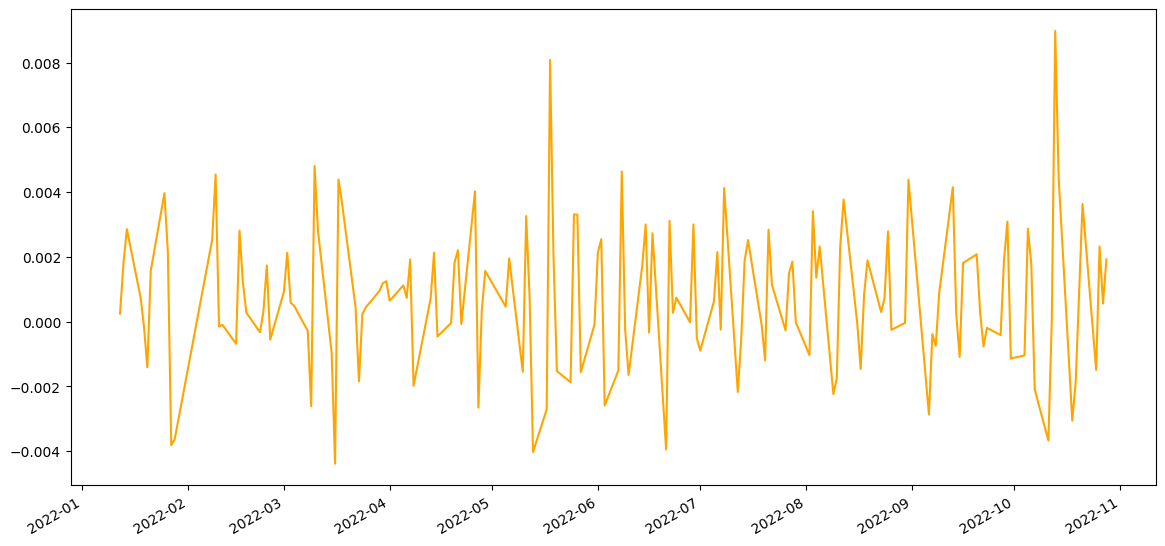

In [ ]:
ax = predicted_values.plot(label='observed', figsize=(14, 7),color='orange')

In [ ]:
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm

p = d = q = range(0, 5)

pdq = list(itertools.product(p, d, q))
import warnings
warnings.filterwarnings("ignore")
best_aic = np.inf
best_pdq = None

for param in pdq:
    try:
        mod = sm.tsa.ARIMA(VCB_cleaned["Daily_Returns"], order=param)

        results = mod.fit()
        print(f"ARIMA({param}) - AIC : {results.aic}")
        if results.aic < best_aic:
            best_aic = results.aic
            best_pdq = param
    except:
        continue

print(f"Best AIC: {best_aic}")
print(f"Best (p, d, q): {best_pdq}")



ARIMA((0, 0, 0)) - AIC : -6478.19042800621
ARIMA((0, 0, 1)) - AIC : -6484.474796555323
ARIMA((0, 0, 2)) - AIC : -6485.919267818956
ARIMA((0, 0, 3)) - AIC : -6485.13552805244
ARIMA((0, 0, 4)) - AIC : -6483.288555399388
ARIMA((0, 1, 0)) - AIC : -5832.381661201339
ARIMA((0, 1, 1)) - AIC : -6464.117852773616
ARIMA((0, 1, 2)) - AIC : -6470.579924025264
ARIMA((0, 1, 3)) - AIC : -6439.901498621841
ARIMA((0, 1, 4)) - AIC : -6471.1674073090835
ARIMA((0, 2, 0)) - AIC : -4663.042718307913
ARIMA((0, 2, 1)) - AIC : -5816.958825744747
ARIMA((0, 2, 2)) - AIC : -6436.710624836508
ARIMA((0, 2, 3)) - AIC : -6328.7721833648775
ARIMA((0, 2, 4)) - AIC : -6442.000570328294
ARIMA((0, 3, 0)) - AIC : -3364.5237335971833
ARIMA((0, 3, 1)) - AIC : -4648.720484065371
ARIMA((0, 3, 2)) - AIC : -5792.457342638555
ARIMA((0, 3, 3)) - AIC : -6384.965137106575
ARIMA((0, 3, 4)) - AIC : -6376.433575882324
ARIMA((0, 4, 0)) - AIC : -2011.2636075999244
ARIMA((0, 4, 1)) - AIC : -3351.1054046853073
ARIMA((0, 4, 2)) - AIC : -462

In [ ]:
model = sm.tsa.ARIMA(train_VCB, order=(5,3,5))
result = model.fit()
print(result.summary())


                               SARIMAX Results                                
Dep. Variable:          Daily_Returns   No. Observations:                  720
Model:                 ARIMA(5, 3, 5)   Log Likelihood                2068.521
Date:                Sun, 05 Nov 2023   AIC                          -4115.041
Time:                        11:20:00   BIC                          -4064.715
Sample:                             0   HQIC                         -4095.609
                                - 720                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -2.7263      0.192    -14.187      0.000      -3.103      -2.350
ar.L2         -3.5723      0.357    -10.004      0.000      -4.272      -2.872
ar.L3         -2.6927      0.376     -7.160      0.0

Root Mean Squared Error (RMSE): 0.014087077600543231


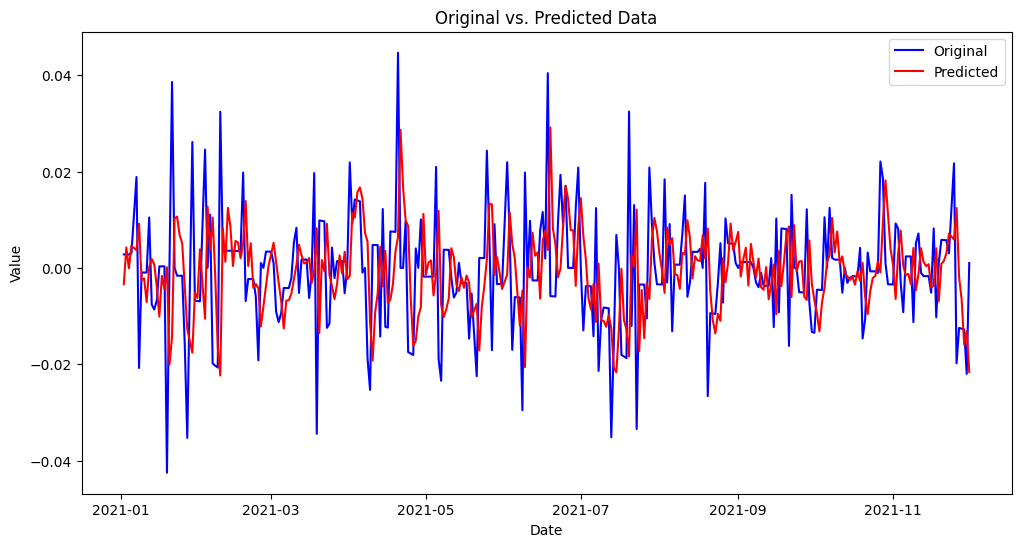

In [ ]:
# start_date = VCB_cleaned["Daily_Returns"].index[1]
start_date = "2021-1-2"
end_date = "2021-12-1"

predictions = result.predict(start=start_date, end= end_date, freq='D', typ='levels')

original_data = VCB_cleaned["Daily_Returns"][start_date:end_date]
rmse = np.sqrt(mean_squared_error(original_data, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

plt.figure(figsize=(12, 6)) 
plt.plot(original_data.index, original_data, label='Original', color='blue')


plt.plot(predictions.index, predictions, label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original vs. Predicted Data')
plt.legend()

plt.show()


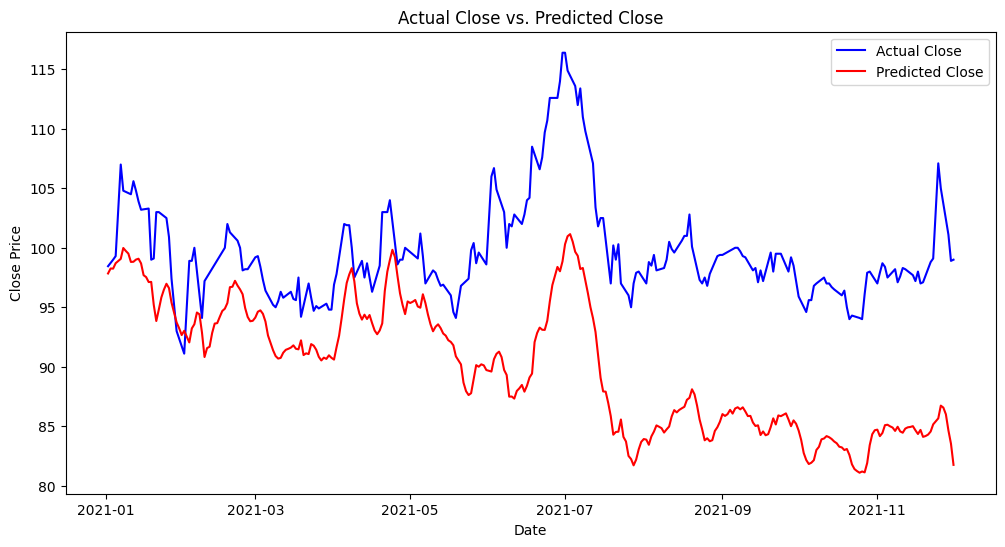

In [ ]:
import matplotlib.pyplot as plt

actual_close = VCB_cleaned["close"][start_date:end_date]

plt.figure(figsize=(12, 6))

plt.plot(actual_close.index, actual_close, label='Actual Close', color='blue')

date_minus_one_day = pd.to_datetime("2021-1-1")
# data_on_date_minus_one_day = VCB_cleaned["close"].index(date_minus_one_day.date().strftime('%Y-%m-%d')).loc[date_minus_one_day.date().strftime('%Y-%m-%d')]
predicted_close = VCB_cleaned["close"].loc[date_minus_one_day.date().strftime('%Y-%m-%d')].values*np.exp(np.cumsum(predictions))

plt.plot(actual_close.index, predicted_close, label='Predicted Close', color='red')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close vs. Predicted Close')
plt.legend()
plt.show()


In [ ]:
# from statsmodels.tsa.arima.model import ARIMA
# import statsmodels.api as sm
# def _arima_fit(orders, data):
#   models = dict()
#   for order in orders:
#     model = sm.tsa.ARIMA(data, order = order).fit()
#     model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
#     print('{} --> AIC={}; BIC={}'.format(model_name, model.aic, model.bic))
#     models[model_name] = model
#   return models

# orders = [(1, 0, 1),(1, 0, 0),(1, 1, 0) , (1, 1, 1),(0, 1, 1),(0,0,1)]
# models = _arima_fit(orders,VCB_Diff_1[:720])

In [ ]:
# from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# import matplotlib.pyplot as plt
# plt.figure(figsize = (50, 10))
# ax1 = plot_acf(VCB_cleaned['Daily_Returns'],lags=40)
# plt.figure(figsize = (50, 10))
# ax1 = plot_pacf(VCB_cleaned['Daily_Returns'],lags=40)

In [ ]:
# import statsmodels.api as sm


# # train_data = VCB_cleaned['Daily_Returns'][:720]
# # test_data = VCB_cleaned['Daily_Returns'][720:]
# train_data = VCB_Diff_1[:720]
# test_data = VCB_Diff_1[720:]
# model = sm.tsa.ARIMA(train_data, order=(29,0,29))
# model = model.fit()

# predictions = model.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic=False, typ='levels')
# from sklearn.metrics import mean_squared_error

# # Tính RMSE
# rmse = np.sqrt(mean_squared_error(test_data, predictions))
# print(f"Root Mean Squared Error (RMSE): {rmse}")

In [ ]:
# print(np.array(predictions)[:6])
# print(np.array(VCB_cleaned['Daily_Returns'][720:][:6]))

In [ ]:
# import matplotlib.pyplot as plt

# # Chọn số lượng quan sát tương ứng với tập kiểm tra
# test_data_length = len(test_data)

# # Tạo một dãy thời gian từ 0 đến độ dài tập kiểm tra
# time = range(test_data_length)

# # Vẽ biểu đồ cho dữ liệu thực tế
# plt.figure(figsize=(12, 6))
# plt.plot(time, test_data, label='Real Data', color='blue')

# # Vẽ biểu đồ cho dự đoán
# plt.plot(time, predictions, label='Predictions', color='red')

# # Đặt tên cho trục và chú thích
# plt.xlabel('Time')
# plt.ylabel('Returns')
# plt.legend()

# # Hiển thị biểu đồ
# plt.show()


In [ ]:
# print(VCB_cleaned['close'][718:721])

In [ ]:
# import numpy as np
# # print(len(predictions))
# # Khởi tạo danh sách reconstructed_close như một danh sách trống
# reconstructed_close = []

# # Lấy giá đóng cuối cùng của tập train và thêm vào danh sách
# reconstructed_close.append(73.5)

# # Tái tạo giá đóng từ dự đoán
# for i in range(720,749):
#     reconstructed_close.append(reconstructed_close[-1] * np.exp(predictions[i]))

# # In kết quả
# print(reconstructed_close[:10])
# print(np.array(VCB_cleaned['close'][720:][:10]))


In [ ]:
# import matplotlib.pyplot as plt

# # Chọn số lượng quan sát tương ứng với tập kiểm tra
# test_data_length = len(VCB_cleaned['close'][720:])

# # Tạo một dãy thời gian từ 0 đến độ dài tập kiểm tra
# time = range(test_data_length)

# # Vẽ biểu đồ cho dữ liệu thực tế
# plt.figure(figsize=(12, 6))
# plt.plot(time, VCB_cleaned['close'][720:], label='Real Data', color='blue')

# # Vẽ biểu đồ cho dự đoán
# plt.plot(time, reconstructed_close[1:], label='Predictions', color='red')

# # Đặt tên cho trục và chú thích
# plt.xlabel('Time')
# plt.ylabel('Returns')
# plt.legend()

# # Hiển thị biểu đồ
# plt.show()

In [ ]:
# import statsmodels.api as sm


# model = sm.tsa.ARIMA(VCB_cleaned['Daily_Returns'][:700], order=(1, 0, 1))

# # Fit mô hình
# model = model.fit()

# # Dự đoán `steps` bước tiếp theo
# steps = 51  # Số bước tiếp theo bạn muốn dự đoán
# forecast = model.get_forecast(steps=steps)

# # Lấy giá trị dự đoán và khoảng tin cậy
# forecast_mean = forecast.predicted_mean
# forecast_ci = forecast.conf_int()

# # In kết quả
# print("Dự đoán:", forecast_mean.tail(10))
# # print("Khoảng tin cậy:", forecast_ci)
# print("REAL:",VCB_cleaned['Daily_Returns'][700:])

In [ ]:
# from pmdarima import auto_arima
# stepwise_fit = auto_arima(VCB_cleaned['Daily_Returns'], start_p=0, start_q=0,
#                            max_p=5, max_q=5, m=12,
#                            start_P=0, seasonal=False,
#                            d=0, D=0, trace=True,
#                            error_action='ignore',  
#                            suppress_warnings=True, 
#                            stepwise=True)

In [ ]:
# fig, ax = plt.subplots(figsize=(15, 10))
# x = np.arange(daily_returns_list.shape[0])
# ax.plot(daily_returns_list,label="real")
# ax.plot(x[700:],forecast_mean, label="fake")
# ax.set_xlabel('Date')
# ax.set_ylabel('Price')
# ax.set_title(f'Plot for Stock Price')
# plt.legend()
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.plot(x[700:],forecast_mean, label="fake")
# fig, ax = plt.subplots(figsize=(15, 10))
# ax.plot(daily_returns_list[700:], label="fake")

In [ ]:
# from statsmodels.tsa.arima_model import ARIMA
# from sklearn.metrics import mean_squared_error, mean_absolute_error